In [1]:
import pandas as pd

In [2]:
agg_df = pd.read_csv("county_daily_aggregated_timeseries.csv",index_col=0)

In [19]:
print(agg_df.shape)
agg_df.head(14)

(645, 10)


,actuals.cases,actuals.deaths,metrics.deathDensity,metrics.caseDensity,metrics.vaccinationsCompletedRatio,metrics.vaccinationsInitiatedRatio,metrics.testPositivityRatio,cdcTransmissionLevel,riskLevels.caseDensity,riskLevels.overall
date,,,,,,,,,,
2020-04-05,331769.0,9285.0,0.031711,9417.1,56.729,177.198,0.106803,0.448738,0.096146,0.195474
2020-04-06,362217.0,10662.0,0.038168,10161.4,56.729,177.198,0.105619,0.451557,0.100693,0.200321
2020-04-07,393641.0,12748.0,0.045717,10931.2,56.729,177.198,0.106687,0.453574,0.106921,0.206631
2020-04-08,425086.0,14655.0,0.050901,11404.1,56.729,177.198,0.106887,0.461696,0.109792,0.208432
2020-04-09,459307.0,16262.0,0.056929,11825.5,56.729,177.198,0.106429,0.463041,0.111778,0.209332
2020-04-10,492377.0,18592.0,0.062314,12092.8,56.729,177.198,0.105356,0.463066,0.114432,0.209797
2020-04-11,523167.0,20340.0,0.066985,12083.9,56.729,177.198,0.105561,0.466015,0.115606,0.210366
2020-04-12,549809.0,21916.0,0.070352,12146.7,56.729,177.198,0.106111,0.465705,0.115642,0.209394
2020-04-13,575201.0,23202.0,0.075433,12050.2,56.729,177.198,0.106568,0.465549,0.113268,0.205809


In [26]:
def create_X_Y(ts, lag=1, n_ahead=1, target_index=0) -> tuple:
    """
    A method to create X and Y matrix from a time series array for the training of 
    deep learning models 
    """
    # Extracting the number of features that are passed from the array 
    n_features = ts.shape[1]
    
    # Creating placeholder lists
    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag - n_ahead):
            Y.append(ts[(i + lag):(i + lag + n_ahead), target_index])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an RNN input shape 
    X = np.reshape(X, (X.shape[0], lag, n_features))

    return X, Y

In [39]:
import numpy as np
ts = agg_df.values
# ts.shape
X, Y = create_X_Y(ts, lag=14, n_ahead=7, target_index=[2,3])

In [40]:
Y[0]

array([[1.18968914e-01, 1.25127000e+04],
       [1.27196305e-01, 1.29165000e+04],
       [1.39546352e-01, 1.32964000e+04],
       [1.47709108e-01, 1.38259000e+04],
       [1.55211733e-01, 1.44240000e+04],
       [1.62683905e-01, 1.53628000e+04],
       [1.69449210e-01, 1.62753000e+04]])

## Analysis Starts here

In [1]:
import pandas as pd
x_train = pd.read_csv("scaled_days_all_features/x_train.csv",index_col=0)
# x_train = pd.read_csv("scaled_days_all_features/x_train.csv",index_col=0)
# y_train = pd.read_csv("scaled_days_all_features/y_train.csv",index_col=0)

# x_val = pd.read_csv("scaled_days_all_features/x_val.csv",index_col=0)
# y_val = pd.read_csv("scaled_days_all_features/y_val.csv",index_col=0)

# x_test = pd.read_csv("scaled_days_all_features/x_test.csv",index_col=0)
# y_test = pd.read_csv("scaled_days_all_features/y_test.csv",index_col=0)

In [16]:
x_test.columns

Index(['actuals.cases(t-14)', 'actuals.deaths(t-14)',
       'metrics.deathDensity(t-14)', 'metrics.caseDensity(t-14)',
       'metrics.vaccinationsCompletedRatio(t-14)',
       'metrics.vaccinationsInitiatedRatio(t-14)',
       'cdcTransmissionLevel(t-14)', 'riskLevels.caseDensity(t-14)',
       'riskLevels.overall(t-14)', 'actuals.cases(t-13)',
       ...
       'riskLevels.overall(t-2)', 'actuals.cases(t-1)', 'actuals.deaths(t-1)',
       'metrics.deathDensity(t-1)', 'metrics.caseDensity(t-1)',
       'metrics.vaccinationsCompletedRatio(t-1)',
       'metrics.vaccinationsInitiatedRatio(t-1)', 'cdcTransmissionLevel(t-1)',
       'riskLevels.caseDensity(t-1)', 'riskLevels.overall(t-1)'],
      dtype='object', length=126)

In [3]:
## RESHAPE
def reshape_data(data, timesteps=1):

    #reshape input to be 3D [samples, timesteps, features]
    np_values = data.values
    new_data = np_values.reshape((np_values.shape[0], timesteps, np_values.shape[1]))
    
    return new_data

X_train= reshape_data(x_train,1)
X_val= reshape_data(x_val,1)
Y_train= reshape_data(y_train,1)
Y_val= reshape_data(y_val,1)

In [4]:
Y_train.shape

(377, 1, 2)

In [5]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Concatenate, LSTM, Dropout, Lambda, Bidirectional
from keras.models import Model
from keras import backend as K #For explicitly adjusting the learning rate
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential

# from tensorflow import keras
import tensorflow.keras.backend as K


In [6]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_root_mean_squared_error', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-10)

# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
optimizer = 'adam'

loss_fn = root_mean_squared_error
# loss_fn = 'mse'

n_output_nodes = 8
model = Sequential()
# model.add(LSTM(60,  input_shape=(X_train.shape[1], X_train.shape[2]))) #return_sequences=True,
# model.add(LSTM(128, activation='relu')) 
# model.add(LSTM(128, activation='relu'))
# model.add(LSTM(128,  activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(128, activation='relu', dropout=0.2), input_shape=(X_train.shape[1],X_train.shape[2])))
# model.add(LSTM(128,  activation='relu', return_sequences=True))
model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(2)) 
model.compile(loss=loss_fn, optimizer=optimizer,metrics = [loss_fn,'mean_squared_error','mean_absolute_percentage_error','mean_absolute_error'])
model.summary()
# fit network

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              261120    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 269,410
Trainable params: 269,410
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=100, batch_size=16,  verbose=1, shuffle=False, callbacks=[learning_rate_reduction])

Epoch 1/100
24/24 [==============================] - 3s 33ms/step - loss: 0.5213 - root_mean_squared_error: 0.5219 - mean_squared_error: 0.3801 - mean_absolute_percentage_error: 133.7095 - mean_absolute_error: 0.4742 - val_loss: 0.6453 - val_root_mean_squared_error: 0.6441 - val_mean_squared_error: 0.4233 - val_mean_absolute_percentage_error: 87.7980 - val_mean_absolute_error: 0.6311 - lr: 0.0010
Epoch 2/100
24/24 [==============================] - 0s 20ms/step - loss: 0.4073 - root_mean_squared_error: 0.4029 - mean_squared_error: 0.2349 - mean_absolute_percentage_error: 89.2017 - mean_absolute_error: 0.3544 - val_loss: 0.2181 - val_root_mean_squared_error: 0.2192 - val_mean_squared_error: 0.0504 - val_mean_absolute_percentage_error: 39.6203 - val_mean_absolute_error: 0.1952 - lr: 0.0010
Epoch 3/100
24/24 [==============================] - 0s 21ms/step - loss: 0.7041 - root_mean_squared_error: 0.6986 - mean_squared_error: 0.8547 - mean_absolute_percentage_error: 135.6607 - mean_absolut

Epoch 20/100
24/24 [==============================] - 0s 21ms/step - loss: 0.1327 - root_mean_squared_error: 0.1313 - mean_squared_error: 0.0258 - mean_absolute_percentage_error: 53.4470 - mean_absolute_error: 0.1043 - val_loss: 0.1209 - val_root_mean_squared_error: 0.1226 - val_mean_squared_error: 0.0194 - val_mean_absolute_percentage_error: 25.7666 - val_mean_absolute_error: 0.0975 - lr: 1.2500e-04
Epoch 21/100
24/24 [==============================] - 0s 20ms/step - loss: 0.1298 - root_mean_squared_error: 0.1284 - mean_squared_error: 0.0249 - mean_absolute_percentage_error: 50.3611 - mean_absolute_error: 0.1003 - val_loss: 0.1257 - val_root_mean_squared_error: 0.1271 - val_mean_squared_error: 0.0194 - val_mean_absolute_percentage_error: 24.5017 - val_mean_absolute_error: 0.0995 - lr: 1.2500e-04
Epoch 22/100
22/24 [==========================>...] - ETA: 0s - loss: 0.1369 - root_mean_squared_error: 0.1369 - mean_squared_error: 0.0271 - mean_absolute_percentage_error: 53.4967 - mean_abs

Epoch 37/100
22/24 [==========================>...] - ETA: 0s - loss: 0.1318 - root_mean_squared_error: 0.1318 - mean_squared_error: 0.0251 - mean_absolute_percentage_error: 47.0435 - mean_absolute_error: 0.1005
Epoch 37: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
24/24 [==============================] - 0s 21ms/step - loss: 0.1270 - root_mean_squared_error: 0.1258 - mean_squared_error: 0.0238 - mean_absolute_percentage_error: 44.8859 - mean_absolute_error: 0.0975 - val_loss: 0.1357 - val_root_mean_squared_error: 0.1369 - val_mean_squared_error: 0.0214 - val_mean_absolute_percentage_error: 26.4678 - val_mean_absolute_error: 0.1131 - lr: 3.9063e-06
Epoch 38/100
24/24 [==============================] - 0s 21ms/step - loss: 0.1274 - root_mean_squared_error: 0.1261 - mean_squared_error: 0.0237 - mean_absolute_percentage_error: 46.7173 - mean_absolute_error: 0.0971 - val_loss: 0.1357 - val_root_mean_squared_error: 0.1370 - val_mean_squared_error: 0.0214 - val_mean_a

Epoch 70/100
22/24 [==========================>...] - ETA: 0s - loss: 0.1316 - root_mean_squared_error: 0.1316 - mean_squared_error: 0.0243 - mean_absolute_percentage_error: 45.1857 - mean_absolute_error: 0.0993
Epoch 70: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
24/24 [==============================] - 0s 19ms/step - loss: 0.1264 - root_mean_squared_error: 0.1250 - mean_squared_error: 0.0231 - mean_absolute_percentage_error: 43.0922 - mean_absolute_error: 0.0962 - val_loss: 0.1360 - val_root_mean_squared_error: 0.1372 - val_mean_squared_error: 0.0215 - val_mean_absolute_percentage_error: 26.5974 - val_mean_absolute_error: 0.1135 - lr: 1.9073e-09
Epoch 71/100
24/24 [==============================] - 0s 20ms/step - loss: 0.1258 - root_mean_squared_error: 0.1245 - mean_squared_error: 0.0233 - mean_absolute_percentage_error: 45.9186 - mean_absolute_error: 0.0961 - val_loss: 0.1360 - val_root_mean_squared_error: 0.1372 - val_mean_squared_error: 0.0215 - val_mean_ab

Epoch 87/100
24/24 [==============================] - 0s 20ms/step - loss: 0.1292 - root_mean_squared_error: 0.1275 - mean_squared_error: 0.0238 - mean_absolute_percentage_error: 45.0277 - mean_absolute_error: 0.0985 - val_loss: 0.1360 - val_root_mean_squared_error: 0.1372 - val_mean_squared_error: 0.0215 - val_mean_absolute_percentage_error: 26.5974 - val_mean_absolute_error: 0.1135 - lr: 1.0000e-10
Epoch 88/100
24/24 [==============================] - 0s 20ms/step - loss: 0.1264 - root_mean_squared_error: 0.1250 - mean_squared_error: 0.0236 - mean_absolute_percentage_error: 43.7813 - mean_absolute_error: 0.0952 - val_loss: 0.1360 - val_root_mean_squared_error: 0.1372 - val_mean_squared_error: 0.0215 - val_mean_absolute_percentage_error: 26.5974 - val_mean_absolute_error: 0.1135 - lr: 1.0000e-10
Epoch 89/100
24/24 [==============================] - 0s 19ms/step - loss: 0.1265 - root_mean_squared_error: 0.1253 - mean_squared_error: 0.0230 - mean_absolute_percentage_error: 45.0609 - mea

dict_keys(['loss', 'root_mean_squared_error', 'mean_squared_error', 'mean_absolute_percentage_error', 'mean_absolute_error', 'val_loss', 'val_root_mean_squared_error', 'val_mean_squared_error', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'lr'])


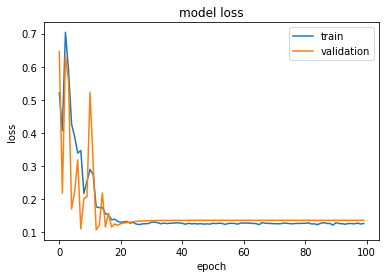

In [14]:
#Visualizing the Loss over epochs
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [15]:
model.evaluate(X_val,Y_val)

3/3 [==============================] - 0s 5ms/step - loss: 0.1659 - root_mean_squared_error: 0.1667 - mean_squared_error: 0.0304 - mean_absolute_percentage_error: 31.0685 - mean_absolute_error: 0.1298


[0.1658955067396164,
 0.16671638190746307,
 0.030382215976715088,
 31.068513870239258,
 0.1298232525587082]

In [43]:
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Dropout, Input, LSTM
# from tensorflow.keras.models import Model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import RMSprop
# model = Sequential()
# model.add(Input(shape=(1, time_steps)))
# model.add(LSTM(48, return_sequences=True))
# model.add(Dropout(0.4))
# model.add(LSTM(48, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(48))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='relu'))
# model.compile(loss = 'mean_squared_error',
#               optimizer = 'adam',
#               metrics = ['mean_squared_error'])
# model.summary()

In [47]:
col = y_test.columns

In [66]:
# for days to predict:
#     day1_predicted = model.fit(day0)
#     day2 = model.fit(day0+day1_predicted)

,actuals.cases(t-14),actuals.deaths(t-14),metrics.deathDensity(t-14),metrics.caseDensity(t-14),metrics.vaccinationsCompletedRatio(t-14),metrics.vaccinationsInitiatedRatio(t-14),cdcTransmissionLevel(t-14),riskLevels.caseDensity(t-14),riskLevels.overall(t-14),actuals.cases(t-13),...,riskLevels.overall(t-2),actuals.cases(t-1),actuals.deaths(t-1),metrics.deathDensity(t-1),metrics.caseDensity(t-1),metrics.vaccinationsCompletedRatio(t-1),metrics.vaccinationsInitiatedRatio(t-1),cdcTransmissionLevel(t-1),riskLevels.caseDensity(t-1),riskLevels.overall(t-1)
date,,,,,,,,,,,,,,,,,,,,,
2021-08-04,0.617520,0.734250,0.695711,-0.708180,0.996703,0.923690,-0.475185,-0.674939,-0.373470,0.620590,...,0.261830,0.677494,0.750165,0.712073,-0.050929,1.057813,1.014766,0.485762,0.156415,0.301002
2021-08-05,0.620590,0.735386,0.696629,-0.659705,1.000411,0.929241,-0.357880,-0.593853,-0.301183,0.628271,...,0.301002,0.683917,0.752540,0.714979,0.015805,1.061799,1.023670,0.538162,0.224259,0.341772
2021-08-06,0.628271,0.736774,0.698197,-0.605539,1.004120,0.935271,-0.241528,-0.511610,-0.232340,0.629548,...,0.341772,0.690158,0.754571,0.716998,0.087378,1.064698,1.029664,0.592230,0.297779,0.393243
2021-08-07,0.629548,0.737176,0.698592,-0.559058,1.006892,0.939735,-0.169597,-0.453676,-0.173766,0.630319,...,0.393243,0.705456,0.756863,0.719369,0.155552,1.068456,1.038035,0.660945,0.367995,0.448558
2021-08-08,0.630319,0.737363,0.698765,-0.518236,1.008825,0.943302,-0.100167,-0.410564,-0.130567,0.635706,...,0.448558,0.707811,0.757667,0.719933,0.220510,1.071739,1.045085,0.697983,0.430757,0.502427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05,1.647446,1.566010,1.650148,0.574655,1.588792,1.597064,0.952004,0.775202,0.794618,1.660997,...,2.173908,1.969179,1.637876,1.727410,3.385488,1.611781,1.626896,1.212338,2.266450,2.352642
2022-01-06,1.660997,1.578945,1.667626,0.619518,1.591085,1.599914,0.998450,0.825174,0.845996,1.676815,...,2.352642,2.007945,1.647325,1.737343,3.775976,1.614054,1.629592,1.220436,2.440479,2.540876
2022-01-07,1.676815,1.583218,1.671238,0.644313,1.593155,1.602876,1.019529,0.847817,0.868411,1.680300,...,2.540876,2.050221,1.654528,1.745241,4.143171,1.616583,1.632843,1.220912,2.554485,2.660975


In [49]:
y_pred = model.predict(reshape_data(x_test, timesteps=1))
y_pred_df=pd.DataFrame()
y_pred_df[col] = y_pred
y_pred_df.index = y_test.index
y_pred_df

,metrics.deathDensity(t),metrics.caseDensity(t)
date,,
2021-08-04,0.776978,-0.518290
2021-08-05,0.782452,-0.504270
2021-08-06,0.785371,-0.485127
2021-08-07,0.794264,-0.463018
2021-08-08,0.806028,-0.445574
...,...,...
2022-01-05,2.127667,-0.557065
2022-01-06,2.055462,-0.437104
2022-01-07,1.963907,-0.298231


In [52]:
y_test

,metrics.deathDensity(t),metrics.caseDensity(t)
date,,
2021-08-04,0.714979,0.015805
2021-08-05,0.716998,0.087378
2021-08-06,0.719369,0.155552
2021-08-07,0.719933,0.220510
2021-08-08,0.720253,0.270596
...,...,...
2022-01-05,1.737343,3.775976
2022-01-06,1.745241,4.143171
2022-01-07,1.752862,4.583388


In [58]:
# y_pred = model.predict(reshape_data(final_fit, timesteps=1)) #Reshaping the final test data and feeding to built lstm model
# # y_pred = y_pred[0] #Extra step??
# y_pred_df = pd.DataFrame(index=pd.date_range(start="2021-12-19", end="2022-01-09", freq="W"))
# y_pred_df['predicted_cases'] = np.array([y_pred[0][1],y_pred[0][3],y_pred[0][5],y_pred[0][7]])
# y_pred_df['predicted_deaths'] = np.array([y_pred[0][0],y_pred[0][2],y_pred[0][4],y_pred[0][6]])

# actual_cases = []
# actual_deaths = []
# for column in final_predict.columns.tolist(): #Assuming the order of the list is maintained 
#     if 'metrics.deathDensity' in column:
#         actual_deaths.append(final_predict[column][0])
#     else:
#         actual_cases.append(final_predict[column][0])

# y_truth_df = pd.DataFrame(index=pd.date_range(start="2021-12-19", end="2022-01-09", freq="W"))
# y_truth_df['actual_cases'] = np.array(actual_cases)
# y_truth_df['actual_deaths'] = np.array(actual_deaths) 

# #Final Dataframes - y_pred_df and y_truth_df
# print(y_pred_df)
# print(y_truth_df)

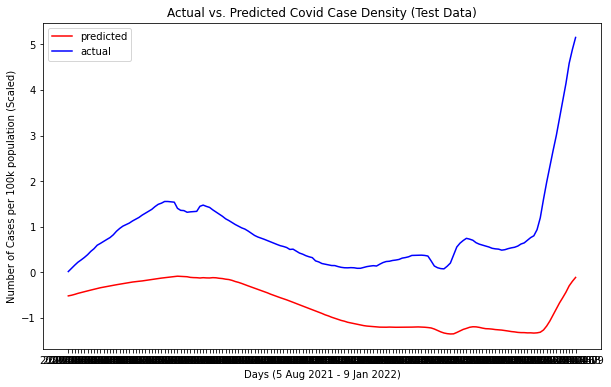

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_pred_df['metrics.caseDensity(t)'], color='red')
plt.plot(y_test['metrics.caseDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Case Density (Test Data)')
plt.ylabel('Number of Cases per 100k population (Scaled)')
plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
plt.legend(['predicted', 'actual'])

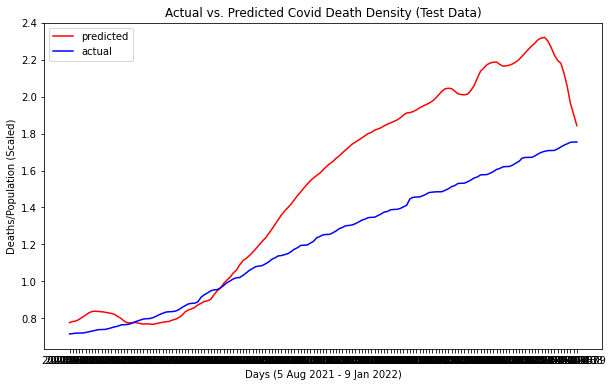

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_pred_df['metrics.deathDensity(t)'], color='red')
plt.plot(y_test['metrics.deathDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Death Density (Test Data)')
plt.ylabel('Deaths/Population (Scaled)')
plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
plt.legend(['predicted', 'actual'])

# Recursive Predictions / Walk Forward Implementation


## Feature Importance


In [70]:
x_train

,actuals.cases(t-14),actuals.deaths(t-14),metrics.deathDensity(t-14),metrics.caseDensity(t-14),metrics.vaccinationsCompletedRatio(t-14),metrics.vaccinationsInitiatedRatio(t-14),cdcTransmissionLevel(t-14),riskLevels.caseDensity(t-14),riskLevels.overall(t-14),actuals.cases(t-13),...,riskLevels.overall(t-2),actuals.cases(t-1),actuals.deaths(t-1),metrics.deathDensity(t-1),metrics.caseDensity(t-1),metrics.vaccinationsCompletedRatio(t-1),metrics.vaccinationsInitiatedRatio(t-1),cdcTransmissionLevel(t-1),riskLevels.caseDensity(t-1),riskLevels.overall(t-1)
date,,,,,,,,,,,,,,,,,,,,,
2020-04-19,-1.416762,-1.732410,-1.447207,-1.120142,-0.902801,-0.935423,-1.281432,-1.605363,-1.292904,-1.414916,...,-1.295610,-1.393031,-1.622999,-1.420295,-1.080617,-0.902801,-0.935423,-1.317993,-1.533877,-1.313013
2020-04-20,-1.414916,-1.726703,-1.445085,-1.109493,-0.902801,-0.935423,-1.268451,-1.580547,-1.264094,-1.413012,...,-1.313013,-1.391488,-1.612733,-1.418530,-1.075852,-0.902801,-0.935423,-1.337286,-1.537180,-1.318640
2020-04-21,-1.413012,-1.718058,-1.442604,-1.098480,-0.902801,-0.935423,-1.259162,-1.546554,-1.226583,-1.411107,...,-1.318640,-1.389861,-1.605177,-1.415826,-1.070075,-0.902801,-0.935423,-1.342050,-1.538281,-1.346312
2020-04-22,-1.411107,-1.710154,-1.440900,-1.091714,-0.902801,-0.935423,-1.221768,-1.530884,-1.215882,-1.409033,...,-1.346312,-1.388320,-1.593254,-1.411767,-1.064640,-0.902801,-0.935423,-1.363248,-1.528456,-1.342254
2020-04-23,-1.409033,-1.703494,-1.438919,-1.085684,-0.902801,-0.935423,-1.215575,-1.520043,-1.210532,-1.407029,...,-1.342254,-1.386635,-1.583481,-1.409084,-1.057064,-0.902801,-0.935423,-1.404096,-1.526508,-1.356920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,0.437489,0.541315,0.506810,-0.534372,0.113617,0.311511,-0.193177,-0.393285,-0.461745,0.442037,...,-0.517828,0.486434,0.585383,0.564967,-0.615568,0.346573,0.473005,-0.252842,-0.452377,-0.530281
2021-04-27,0.442037,0.545157,0.510003,-0.512885,0.129119,0.323940,-0.174241,-0.370698,-0.439361,0.446771,...,-0.530281,0.489198,0.587335,0.566671,-0.625126,0.356958,0.479474,-0.272730,-0.461609,-0.537998
2021-04-28,0.446771,0.548630,0.512596,-0.505114,0.152864,0.346633,-0.171145,-0.356836,-0.436102,0.451321,...,-0.537998,0.492252,0.590162,0.567561,-0.631789,0.367484,0.485337,-0.267609,-0.474992,-0.545378


 Computing LSTM feature importance...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126/126 [00:05<00:00, 23.68it/s]


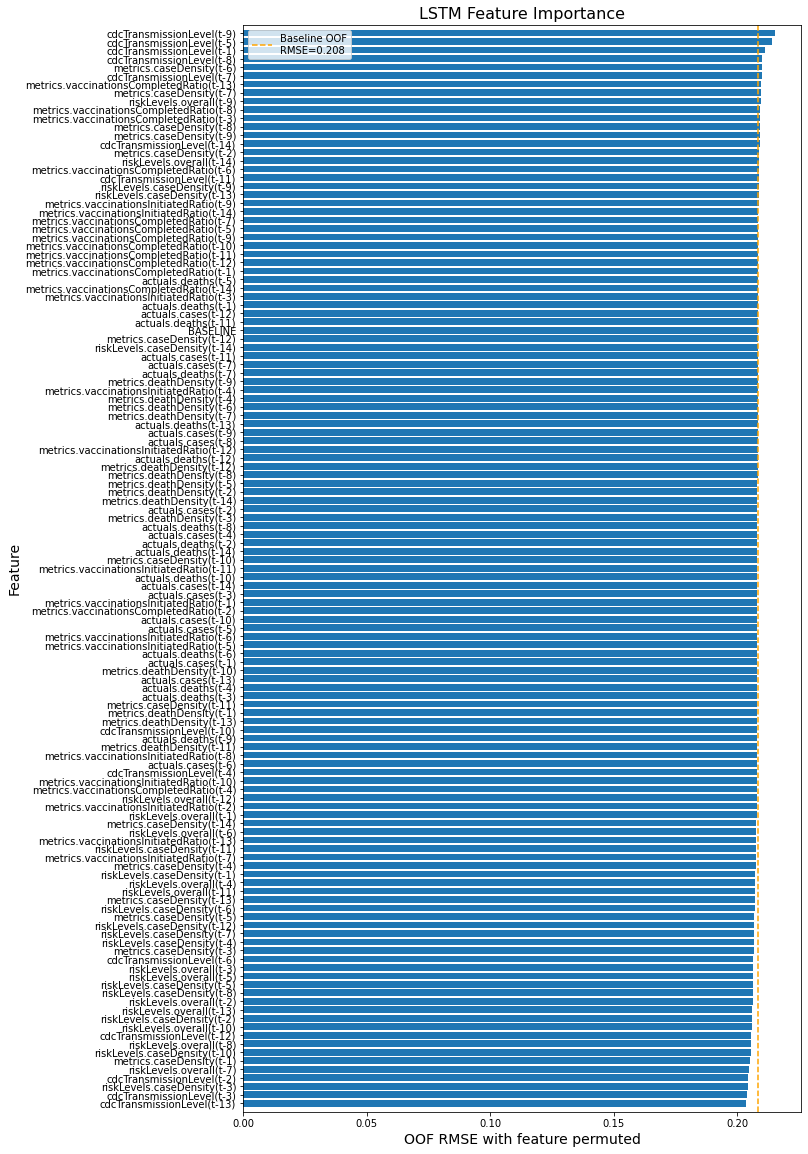

In [87]:
from tqdm import tqdm
COLS = x_train.columns.tolist()
results = []
print(' Computing LSTM feature importance...')

def rmse(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_pred - y_true)))

# COMPUTE BASELINE (NO SHUFFLE)
oof_preds = model.predict(X_val, verbose=0).squeeze() 
# baseline_mae = np.mean(np.abs( oof_preds-Y_val ))
baseline_rmse = rmse(Y_val, oof_preds)
results.append({'feature':'BASELINE','rmse':baseline_rmse})           

for k in tqdm(range(len(COLS))):

    # SHUFFLE FEATURE K
    save_col = X_val[:,:,k].copy()
    np.random.shuffle(X_val[:,:,k])

    # COMPUTE OOF MAE WITH FEATURE K SHUFFLED
    oof_preds = model.predict(X_val, verbose=0).squeeze() 
    rmse_ = rmse(Y_val, oof_preds)
    results.append({'feature':COLS[k],'rmse':rmse_})
    X_val[:,:,k] = save_col

# DISPLAY LSTM FEATURE IMPORTANCE
print()
df = pd.DataFrame(results)
df = df.sort_values('rmse')

plt.figure(figsize=(10,20))
plt.barh(np.arange(len(COLS)+1),df.rmse)
plt.yticks(np.arange(len(COLS)+1),df.feature.values)
plt.title('LSTM Feature Importance',size=16)
plt.ylim((-1,len(COLS)+1))
plt.plot([baseline_rmse,baseline_rmse],[-1,len(COLS)+1], '--', color='orange',
         label=f'Baseline OOF\nRMSE={baseline_rmse:.3f}')
plt.xlabel(f'OOF RMSE with feature permuted',size=14)
plt.ylabel('Feature',size=14)
plt.legend()
plt.show()

# SAVE LSTM FEATURE IMPORTANCE
# df = df.sort_values('mae',ascending=False)
# df.to_csv(f'lstm_feature_importance_fold_{fold+1}.csv',index=False)

In [ ]:
EPOCH = 100
BATCH_SIZE = 32
NUM_FOLDS = 10

# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# GET GPU STRATEGY
gpu_strategy = tf.distribute.get_strategy()

with gpu_strategy.scope():
    kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=2021)
    test_preds = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(train, targets)):
        K.clear_session()
        
        print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)
        X_train, X_valid = train[train_idx], train[test_idx]
        y_train, y_valid = targets[train_idx], targets[test_idx]
        
        checkpoint_filepath = f"folds{fold}.hdf5"
        if TRAIN_MODEL:
#             model = keras.models.Sequential([
#                 keras.layers.Input(shape=train.shape[-2:]),
#                 keras.layers.Bidirectional(keras.layers.LSTM(1024, return_sequences=True)),
#                 keras.layers.Bidirectional(keras.layers.LSTM(512, return_sequences=True)),
#                 keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True)),
#                 keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
#                 keras.layers.Dense(128, activation='selu'),
#                 keras.layers.Dense(1),
#             ])
            
            n_output_nodes = 2
            lstm_nodes = 64
            dense_1_nodes = 32
            optimizer = 'adam'
            loss_fn = root_mean_squared_error

            model = Sequential()
            model.add(Bidirectional(LSTM(lstm_nodes, activation='relu', dropout=0.2), input_shape=(X_train.shape[1],X_train.shape[2])))
            # model.add(LSTM(128,  activation='relu', return_sequences=True))
            model.add(Dense(dense_1_nodes, activation="selu"))
            model.add(Dense(n_output_nodes)) 
            model.compile(loss=loss_fn, optimizer=optimizer,metrics = [loss_fn])
            model.summary()
            model.compile(optimizer="adam", loss="mae")
            checkpoint_filepath = "vanillalstm"
            
            lr = ReduceLROnPlateau(monitor='val_loss',patience=20, verbose=1, factor=0.5, min_lr=1e-10)
#             es = EarlyStopping(monitor="val_loss", patience=20, verbose=1, mode="min", restore_best_weights=True)
            sv = ModelCheckpoint(
                checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                save_weights_only=False, mode='auto', save_freq='epoch',
                options=None
            )
#             model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[lr, es, sv])
            model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=100, batch_size=16,  verbose=1, shuffle=False, callbacks=[lr,sv])
        else:
            model = keras.models.load_model('../input/finetune-of-tensorflow-bidirectional-lstm/'+checkpoint_filepath)

        if INFER_TEST:
            print(' Predicting test data...')
            test_preds.append(model.predict(reshape_data(x_test, timesteps=1)))
                    
        if COMPUTE_LSTM_IMPORTANCE:          
            COLS = x_train.columns.tolist()
            results = []
            print(' Computing LSTM feature importance...')

            def rmse(y_true, y_pred):
                    return np.sqrt(np.mean(np.square(y_pred - y_true)))

            # COMPUTE BASELINE (NO SHUFFLE)
            oof_preds = model.predict(X_val, verbose=0).squeeze() 
            # baseline_mae = np.mean(np.abs( oof_preds-Y_val ))
            baseline_rmse = rmse(Y_val, oof_preds)
            results.append({'feature':'BASELINE','rmse':baseline_rmse})           

            for k in tqdm(range(len(COLS))):

                # SHUFFLE FEATURE K
                save_col = X_val[:,:,k].copy()
                np.random.shuffle(X_val[:,:,k])

                # COMPUTE OOF MAE WITH FEATURE K SHUFFLED
                oof_preds = model.predict(X_val, verbose=0).squeeze() 
                rmse_ = rmse(Y_val, oof_preds)
                results.append({'feature':COLS[k],'rmse':rmse_})
                X_val[:,:,k] = save_col

            # DISPLAY LSTM FEATURE IMPORTANCE
            print()
            df = pd.DataFrame(results)
            df = df.sort_values('rmse')

            plt.figure(figsize=(10,20))
            plt.barh(np.arange(len(COLS)+1),df.rmse)
            plt.yticks(np.arange(len(COLS)+1),df.feature.values)
            plt.title('LSTM Feature Importance',size=16)
            plt.ylim((-1,len(COLS)+1))
            plt.plot([baseline_rmse,baseline_rmse],[-1,len(COLS)+1], '--', color='orange',
                     label=f'Baseline OOF\nRMSE={baseline_rmse:.3f}')
            plt.xlabel(f'OOF RMSE with feature permuted',size=14)
            plt.ylabel('Feature',size=14)
            plt.legend()
            plt.show()
            
            # SAVE LSTM FEATURE IMPORTANCE
            df = df.sort_values('mae',ascending=False)
            df.to_csv(f'lstm_feature_importance_fold_{fold+1}.csv',index=False)
                               
        # ONLY DO ONE FOLD
        if ONE_FOLD_ONLY: break


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_root_mean_squared_error', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-10)

n_output_nodes = 2
lstm_nodes = 64
dense_1_nodes = 32
optimizer = 'adam'
loss_fn = root_mean_squared_error

model = Sequential()
model.add(Bidirectional(LSTM(lstm_nodes, activation='relu', dropout=0.2), input_shape=(X_train.shape[1],X_train.shape[2])))
# model.add(LSTM(128,  activation='relu', return_sequences=True))
model.add(Dense(dense_1_nodes, activation="relu"))
model.add(Dense(n_output_nodes)) 
model.compile(loss=loss_fn, optimizer=optimizer,metrics = [loss_fn])
model.summary()
# fit network